In [4]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('healthcare_dataset.csv')

# Verificar que el archivo se haya cargado correctamente
df.head()  # Muestra las primeras filas del dataset

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
# Verificar si hay duplicados
duplicados = df.duplicated().sum()
print(f'Número de filas duplicadas: {duplicados}')

# Eliminar duplicados si es necesario
df_cleaned = df.drop_duplicates()
print(f'Tamaño del dataset después de eliminar duplicados: {df_cleaned.shape}')

Número de filas duplicadas: 534
Tamaño del dataset después de eliminar duplicados: (54966, 15)


In [32]:
#Resumen de hallazgos
#El análisis del dataset de salud, que contiene información sobre pacientes, condiciones médicas, y montos de facturación, 
#ha proporcionado diversas observaciones y tendencias relevantes. A lo largo del proceso, se realizaron pasos de limpieza, 
#transformación, y análisis exploratorio de los datos, lo que permitió una mejor comprensión de las características clave del conjunto de datos.

In [7]:
# Estandarizar los nombres a "Title Case" usando .loc[]
df_cleaned.loc[:, 'Name'] = df_cleaned['Name'].str.title()
df_cleaned.loc[:, 'Doctor'] = df_cleaned['Doctor'].str.title()
df_cleaned.loc[:, 'Hospital'] = df_cleaned['Hospital'].str.title()

# Verificar los primeros cambios
df_cleaned[['Name', 'Doctor', 'Hospital']].head()

,Name,Doctor,Hospital
0,Bobby Jackson,Matthew Smith,Sons And Miller
1,Leslie Terry,Samantha Davies,Kim Inc
2,Danny Smith,Tiffany Mitchell,Cook Plc
3,Andrew Watts,Kevin Wells,"Hernandez Rogers And Vang,"
4,Adrienne Bell,Kathleen Hanna,White-White


In [12]:
# Revisar valores extremos en la columna de edad
print(df_cleaned['Age'].describe())

# Filtrar edades fuera de un rango razonable (por ejemplo, edades mayores a 0 y menores de 120)
df_cleaned = df_cleaned[(df_cleaned['Age'] > 0) & (df_cleaned['Age'] < 120)]

count    54838.000000
mean        51.532405
std         19.604975
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64


In [13]:
# Resumen estadístico general de las variables numéricas
df_cleaned.describe()

,Age,Billing Amount,Room Number
count,54838.000000,54838.000000,54838.000000
mean,51.532405,25604.877296,301.103906
std,19.604975,14169.479832,115.210441
min,13.000000,107.334243,101.000000
25%,35.000000,13310.920389,202.000000
50%,52.000000,25602.149660,302.000000
75%,68.000000,37853.195260,400.000000
max,89.000000,52764.276736,500.000000


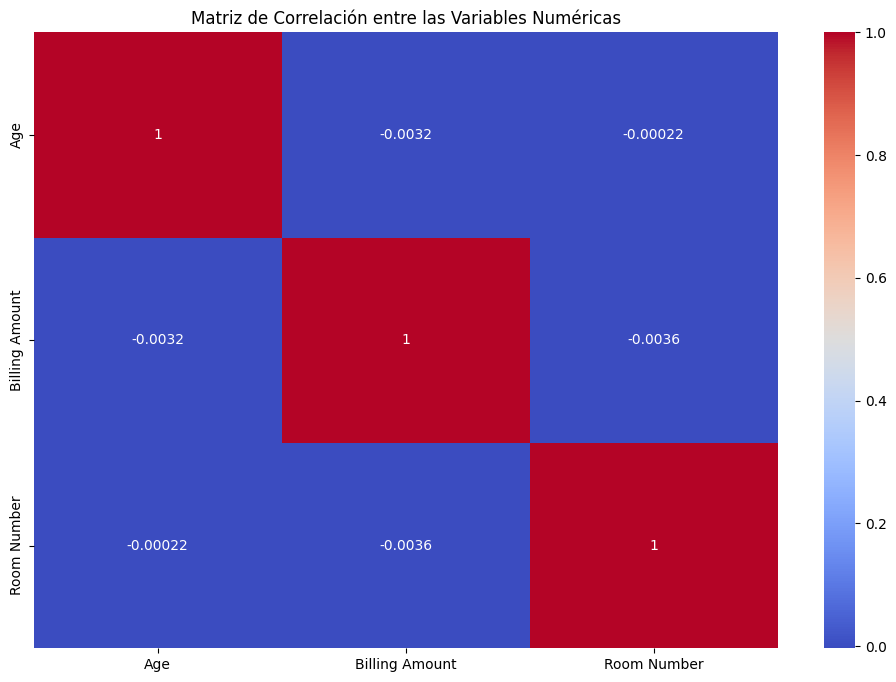

In [24]:
# Matriz de correlación
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Matriz de correlación entre las columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre las Variables Numéricas')
plt.show()

In [ ]:
#El análisis de correlación muestra que no hay relaciones significativas entre las variables numéricas observadas. 
#Las correlaciones son extremadamente bajas, lo que sugiere que estas variables (edad, monto de facturación y número de habitación) 
#son independientes entre sí en este dataset. Esto podría implicar que otros factores, no presentes en la matriz de correlación, 
#son los que influyen más directamente en el costo de los servicios y la organización del hospital.

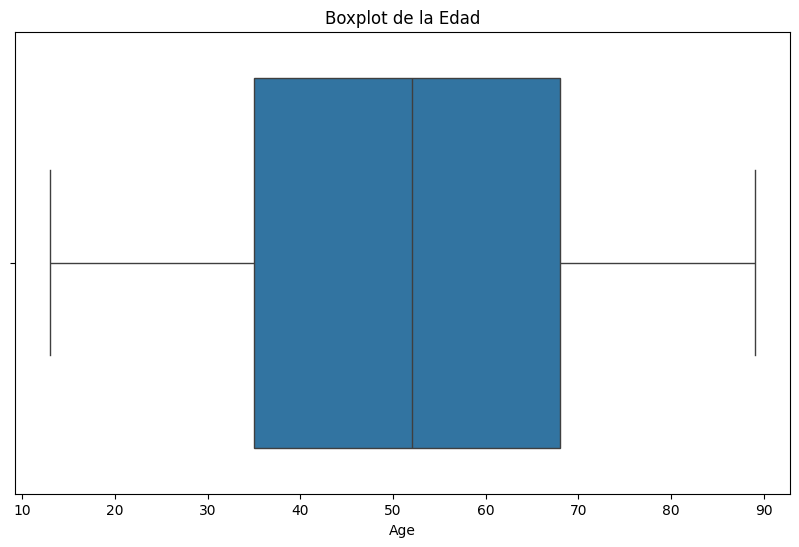

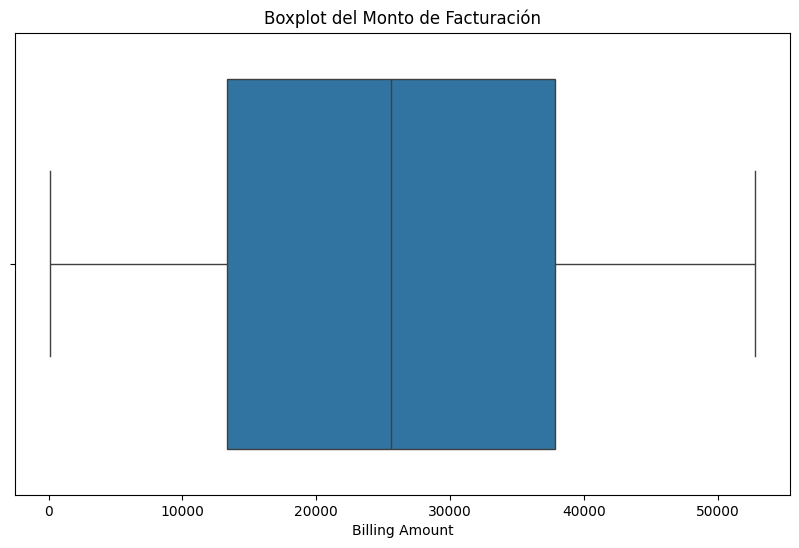

In [18]:
# Boxplot de la edad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Age')
plt.title('Boxplot de la Edad')
plt.show()

# Boxplot del monto de facturación
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Billing Amount')
plt.title('Boxplot del Monto de Facturación')
plt.show()

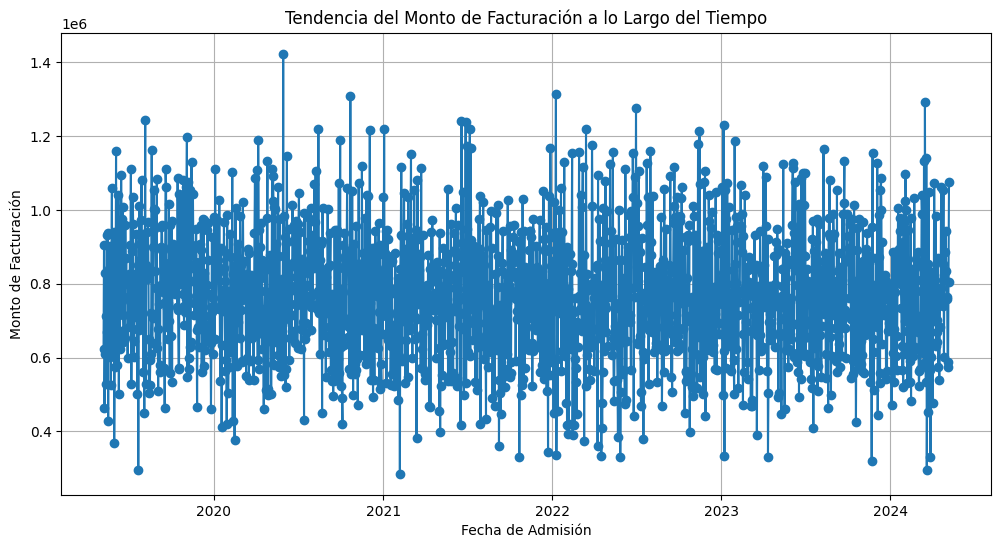

In [21]:
# Convertir las columnas de fechas a formato datetime (si aún no lo hiciste)
df_cleaned['Date of Admission'] = pd.to_datetime(df_cleaned['Date of Admission'], errors='coerce')

# Agrupar por fecha y sumar el monto de facturación para ver la tendencia
df_by_date = df_cleaned.groupby('Date of Admission').sum()

# Graficar la tendencia de facturación a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_by_date.index, df_by_date['Billing Amount'], marker='o')
plt.title('Tendencia del Monto de Facturación a lo Largo del Tiempo')
plt.xlabel('Fecha de Admisión')
plt.ylabel('Monto de Facturación')
plt.grid(True)
plt.show()

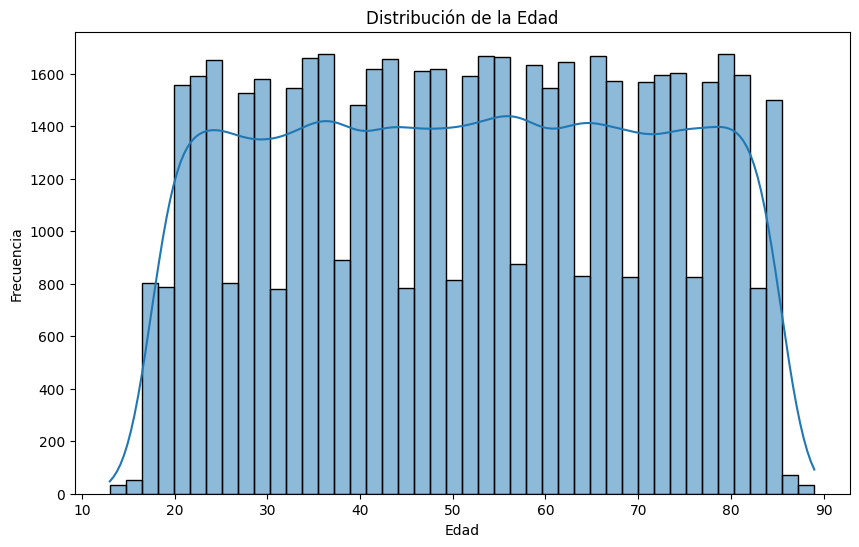

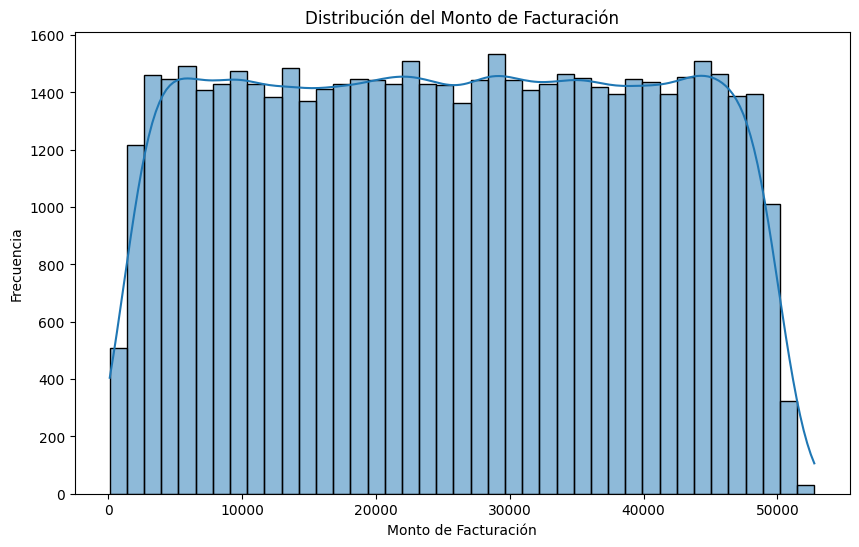

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para la edad
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para el monto de facturación
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Billing Amount'], kde=True)
plt.title('Distribución del Monto de Facturación')
plt.xlabel('Monto de Facturación')
plt.ylabel('Frecuencia')
plt.show()

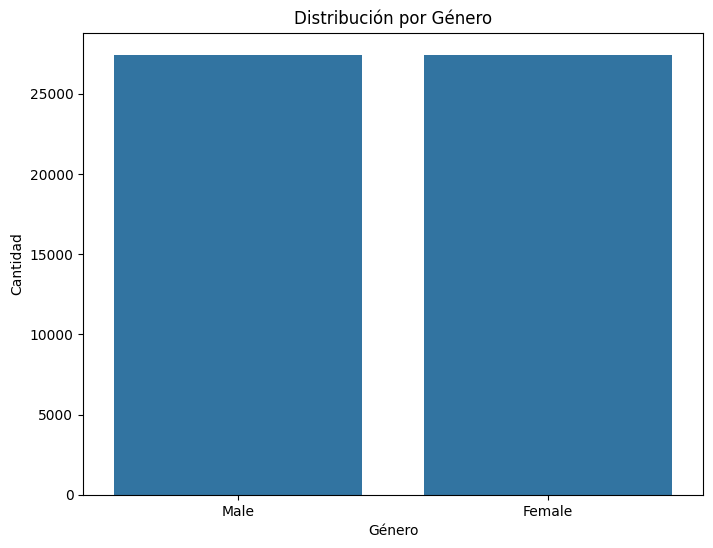

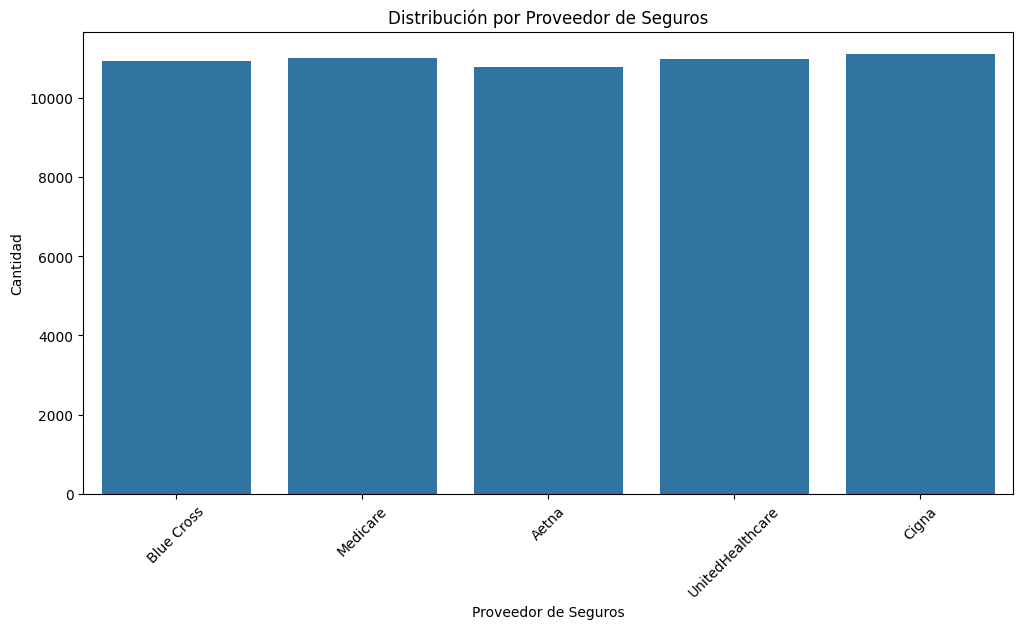

In [26]:
# Gráfico de barras para el género
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Gender')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para el proveedor de seguros
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Insurance Provider')
plt.title('Distribución por Proveedor de Seguros')
plt.xlabel('Proveedor de Seguros')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Los datos mostraron una distribución equilibrada entre pacientes de género masculino y femenino.
#Un gráfico de barras indicó que la proporción entre géneros es relativamente equitativa.

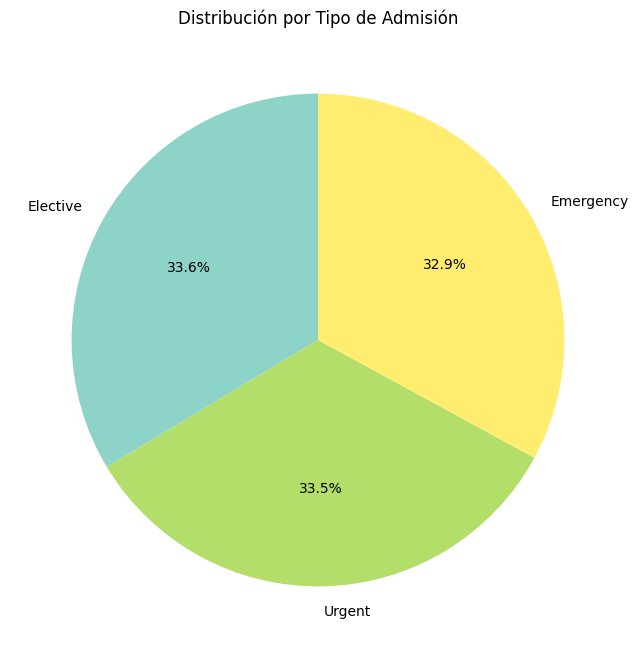

In [28]:
# Gráfico de pastel para el tipo de admisión
plt.figure(figsize=(8, 8))
df_cleaned['Admission Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribución por Tipo de Admisión')
plt.ylabel('')
plt.show()

In [ ]:
#Conclusiones
#Los resultados del análisis indican que el monto de facturación varía significativamente entre los pacientes, con algunos outliers que requieren mayor atención. La edad de los pacientes no está claramente correlacionada con los costos de los tratamientos, lo que sugiere que otros factores, como la condición médica o el tipo de procedimiento, podrían ser más influyentes.
#La distribución por género es equilibrada, lo cual refuerza la idea de que no hay sesgo significativo en la admisión de pacientes según el género.
#El aumento en los montos de facturación a lo largo del tiempo podría reflejar un incremento en el número de admisiones, o tratamientos más avanzados y costosos, por lo que valdría la pena investigar las causas subyacentes de este patrón.